In [2]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad

import scipy
import scipy.io as sio
import scipy.fftpack

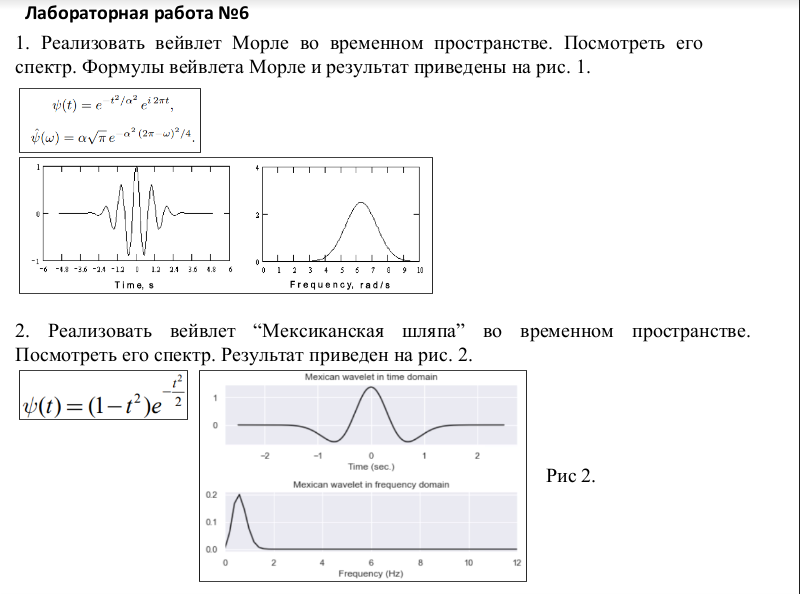

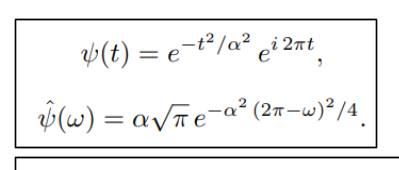

In [3]:
# случайный сиграл
def simple_signal_and_spector(time, step):
    points = len(time)
    freq_mod = np.exp(-time**2) * 10 + 10
    freq_mod = freq_mod + np.linspace(0, 10, points)
    signal = np.sin(2 * np.pi * time)
    signal = np.sin(2 * np.pi * (time + np.cumsum(freq_mod) / step))
    spectrum = np.abs(np.fft.fft(signal))
    return signal, spectrum

# случайный сиграл
def raundom_signal_and_spector(starts, finish, step):
    np.random.seed(422)
    t = np.linspace(starts, finish, step)
    amplitude = 2.0
    frequency = 5.0  # Гц
    noise_amplitude = 0.2
    signal = amplitude * np.sin(2 * np.pi * frequency * t) + noise_amplitude * np.random.randn(len(t))
    spectrum = np.abs(np.fft.fft(signal))
    return t, signal, spectrum

# вейвлет Морле
def func_mortel_signal(t, a):
    # np.exp((-t**2)/(sigma**2)) * np.exp(1j * 2 * np.pi * freq * t)
    return np.exp(-t**2/a**2) * np.cos(2 * np.pi * t)

def get_mortel_signal_and_spectr(starts, finish, step, a):
    t = np.linspace(starts, finish, step)
    signal = np.array([func_mortel_signal(x, a) for x in t])
    morlet_spectrum = np.abs(np.fft.fft(signal))
    return t, signal, morlet_spectrum

# “Мексиканская шляпа”
def mexican_hat_signal_f(t, sigma):
    return (1 - t**2) * np.exp(-t**2 / (2))

def get_mexican_hat_signal_and_spectr(starts, finish, step, a):
    t = np.linspace(starts, finish, step)
    signal = np.array([mexican_hat_signal_f(x, a) for x in t])
    hat_spectrum = np.abs(np.fft.fft(signal))
    return t, signal, hat_spectrum

# вейвлет Хаара во временном пространстве.
def hara_signal(t):
    if 0 <= t < 0.5:
        return 1
    elif 0.5 <= t < 1:
        return -1
    else:
        return 0

def get_hara_signal_and_spectr(starts, finish, step):
    t = np.linspace(starts, finish, step)
    signal = np.array([hara_signal(x) for x in t])
    hat_spectrum = np.abs(np.fft.fft(signal))
    return t, signal, hat_spectrum

# время ---
def MorleWewlet(t, freq = 2, sigma=0.1):
    return np.exp((-t**2)/(sigma**2)) * np.exp(1j * 2 * np.pi * freq * t)

# Создает вейвлеты на основе заданной функции вейвлета для различных частот
def create_wavelets(wavelet_function, time, Freq1=50, Freq2_min=0, Freq2_max = 50, wavelet_params={}):
    Freq2 = np.linspace(Freq2_min, Freq2_max, Freq1)
    Ws = np.zeros((Freq1, len(time)), dtype=complex)

    for wi in range(0, Freq1):
        wavelet = wavelet_function

    Freq2 = np.linspace(Freq2_min, Freq2_max, Freq1)
    Ws = np.zeros((Freq1, len(time)), dtype=complex)
    
    for wi in range(0, Freq1):
        wavelet = wavelet_function(time, Freq2[wi], **wavelet_params)
        Ws[wi, :] = wavelet
        
    return Freq2, Ws

# Вычисляет частотно-временную мощность с использованием вейвлетов
def compute_time_frequency(time, signal, Freq2, Ws, wewlet_time=None):
    if wewlet_time is None:
        conv = len(time) * 2 - 1
        half = len(time) // 2
    else:
        conv = len(time) + len(wewlet_time) - 1
        half = len(wewlet_time) // 2
    
    sigX = scipy.fftpack.fft(signal, conv)
    tf = np.zeros((len(Freq2), len(time)))

    for fi in range(len(Freq2)):
        waveX = scipy.fftpack.fft(Ws[fi, :], conv)
        waveX = waveX / np.max(waveX)
        conv_res = scipy.fftpack.ifft(waveX * sigX)
        conv_res = conv_res[half - 1: -half][:time.shape[0]]
        tf[fi, :] = np.abs(conv_res)**2

    return tf


# Реализовать вейвлет Морле во временном пространстве.

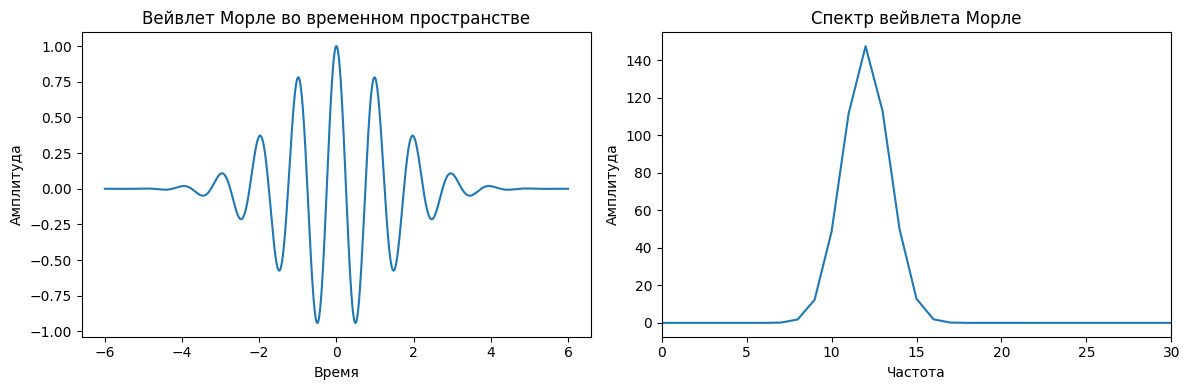

In [4]:
morlet_t, morlet_signal, morlet_spectrum = get_mortel_signal_and_spectr(-6, 6, 1000, 2)

# Построение вейвлета Морле во временном пространстве
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(morlet_t, morlet_signal)
plt.title('Вейвлет Морле во временном пространстве')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(122)
plt.plot(morlet_spectrum)
plt.title('Спектр вейвлета Морле')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.xlim(0, 30)  # Ограничение для лучшей видимости спектра
plt.tight_layout()

plt.show()

# “Мексиканская шляпа”

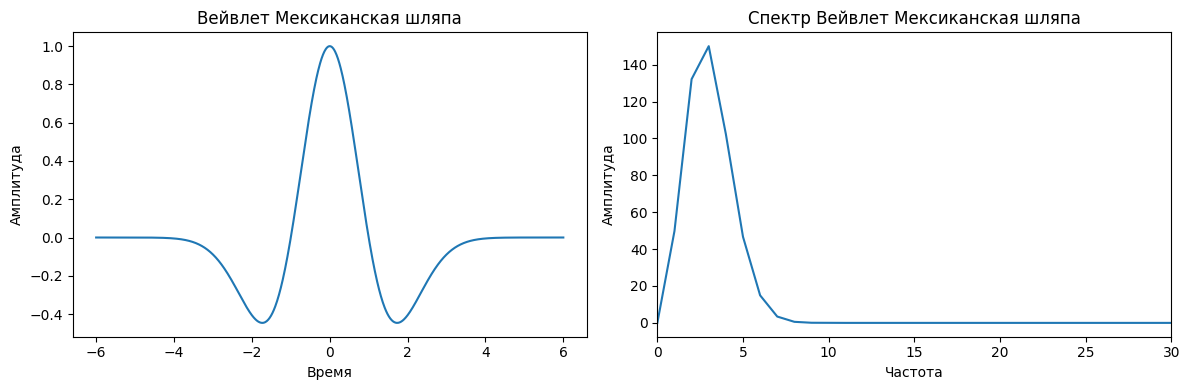

In [5]:
mexican_hat_t, mexican_hat_signal, mexican_hat_spectrum = get_mexican_hat_signal_and_spectr(-6, 6, 1000, 2)

# Построение вейвлета Морле во временном пространстве
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(mexican_hat_t, mexican_hat_signal)
plt.title('Вейвлет Мексиканская шляпа')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(122)
plt.plot(mexican_hat_spectrum)
plt.title('Спектр Вейвлет Мексиканская шляпа')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.xlim(0, 30)  # Ограничение для лучшей видимости спектра
plt.tight_layout()

plt.show()

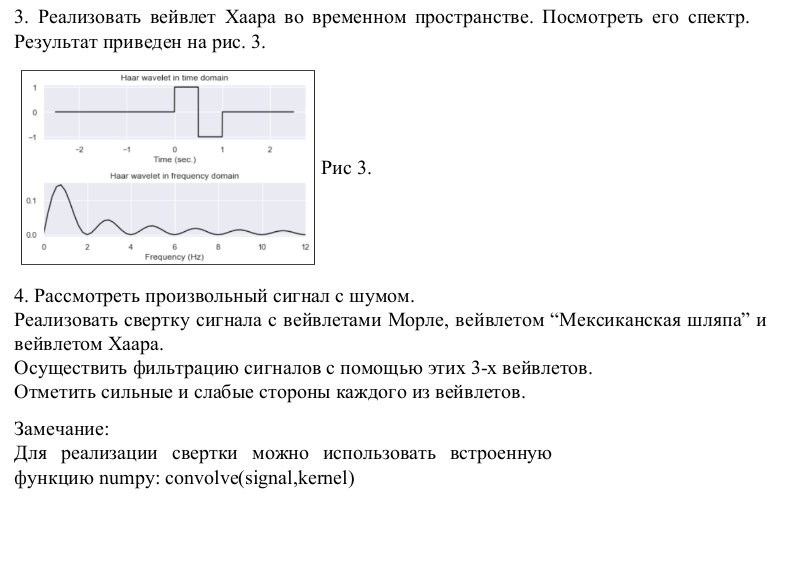

# Реализовать вейвлет Хаара во временном пространстве.

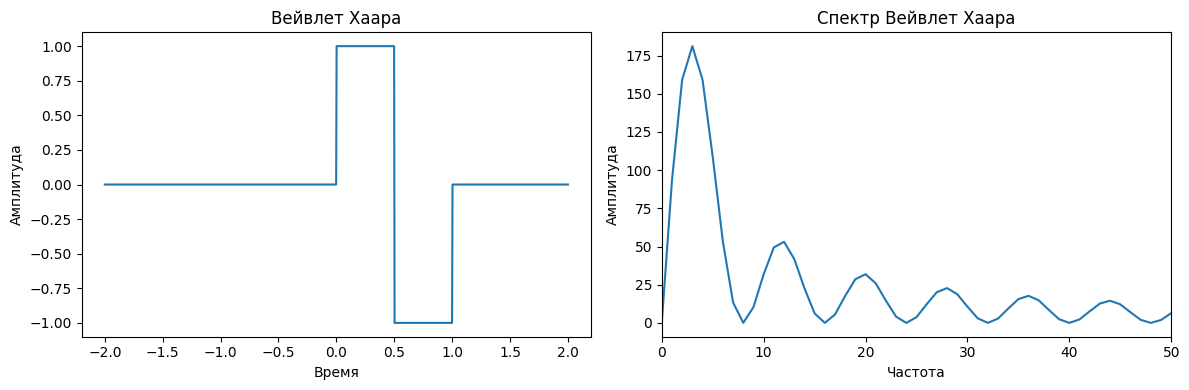

In [6]:
haar_t, haar_signal, hara_spectrum = get_hara_signal_and_spectr(-2, 2, 1000)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(haar_t, haar_signal)
plt.title('Вейвлет Хаара')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(122)
plt.plot(hara_spectrum)
plt.title('Спектр Вейвлет Хаара')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.xlim(0, 50)
plt.tight_layout()

plt.show()

# Рассмотреть произвольный сигнал с шумом.

Реализовать свертку сигнала с вейвлетами Морле, вейвлетом “Мексиканская шляпа” и
вейвлетом Хаара.

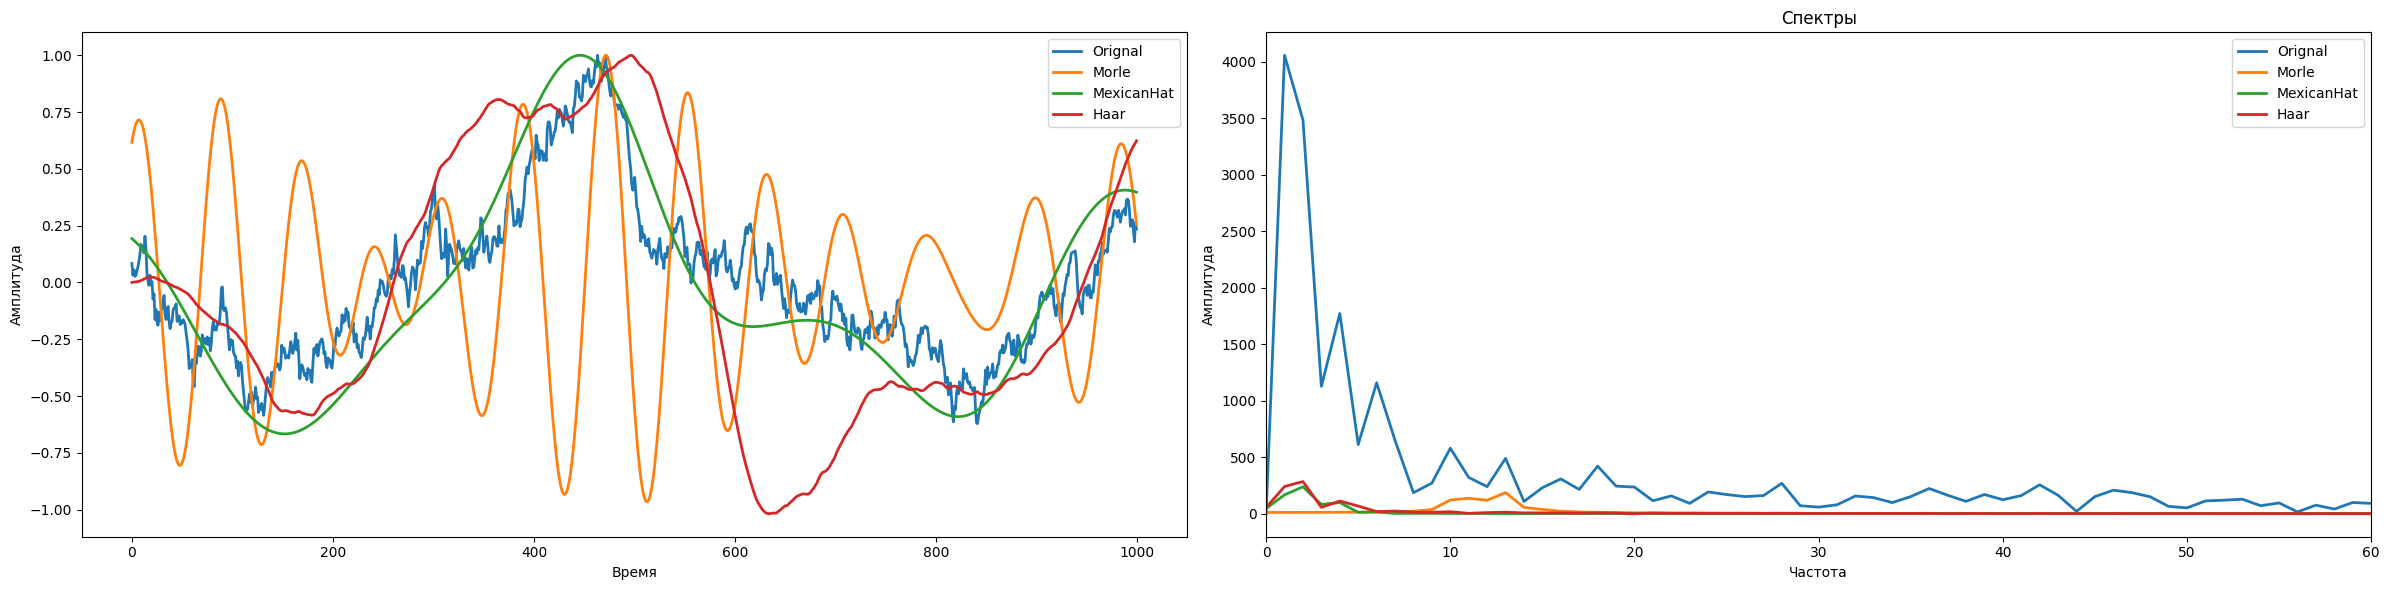

In [7]:
def convole_by_welet(signal_func, wewlet_kernel, normalize=False):
    conved = np.convolve(signal_func, wewlet_kernel, 'same')
    if normalize: conved /= np.max(conved)
    return conved

np.random.seed(422)
signal = scipy.signal.detrend(np.cumsum(np.random.randn(1000)))
signal_morle_conved   = convole_by_welet(signal, morlet_signal, True)
signal_mexican_conved = convole_by_welet(signal, mexican_hat_signal, True)
signal_haar_conved    = convole_by_welet(signal, haar_signal, True)

signal_spector = np.fft.fft(signal)
signal_morle_conved_spec   = np.fft.fft(signal_morle_conved)
signal_haar_conved_spec    = np.fft.fft(signal_haar_conved)
signal_mexican_conved_spec = np.fft.fft(signal_mexican_conved)

plt.figure(figsize=(24, 6))
plt.subplot(121)
plt.plot(signal/np.max(signal), label='Orignal', linewidth=2)
plt.plot(signal_morle_conved, label='Morle', linewidth=2)
plt.plot(signal_mexican_conved, label="MexicanHat", linewidth=2)
plt.plot(signal_haar_conved, label='Haar', linewidth=2)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend()

plt.subplot(122)
plt.plot(np.abs(signal_spector), label='Orignal', linewidth=2)
plt.plot(np.abs(signal_morle_conved_spec), label='Morle', linewidth=2)
plt.plot(np.abs(signal_mexican_conved_spec), label="MexicanHat" , linewidth=2)
plt.plot(np.abs(signal_haar_conved_spec), label='Haar', linewidth=2)
plt.title('Спектры')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.xlim(0, 60)
plt.tight_layout()
plt.legend()

plt.show()


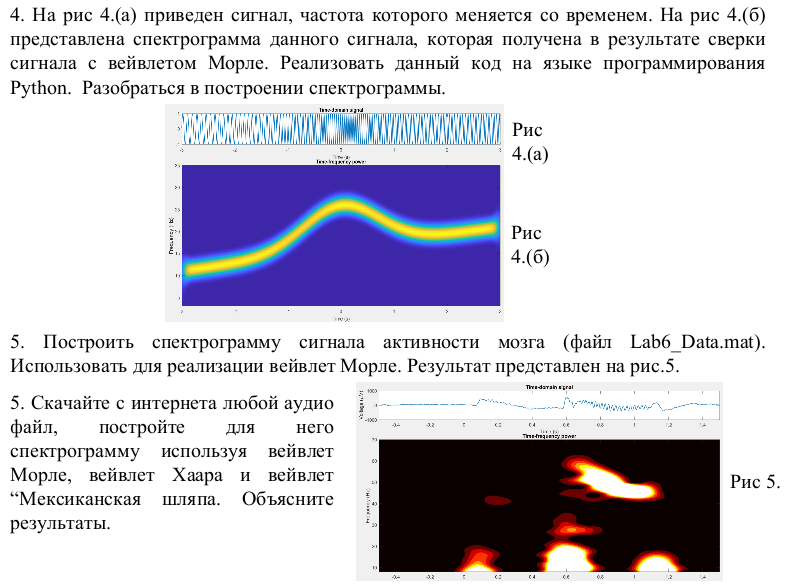

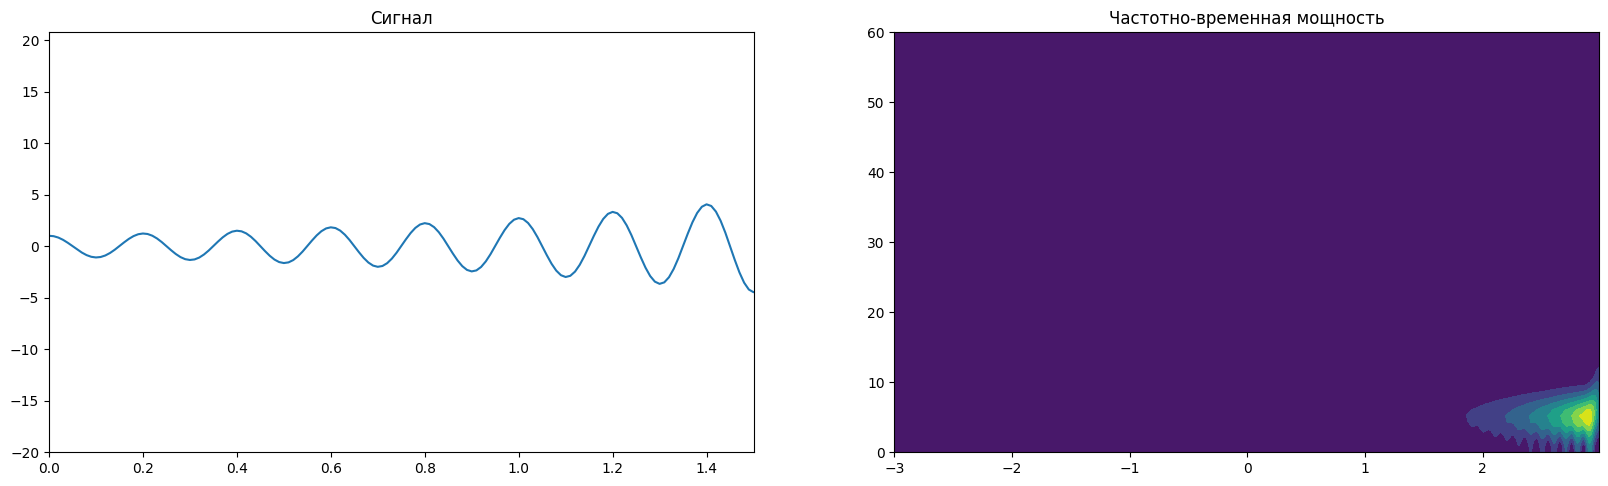

In [16]:
step = 100
time_series = np.arange(-3, 3, 1/step)
signal, spertor = simple_signal_and_spector(time_series, step)

t = np.cos(time_series * np.pi * 10)
signal = t * np.exp(2)
w, Ws = create_wavelets(MorleWewlet, time_series, Freq1=70, Freq2_max=60, wavelet_params={"sigma":0.07})
tf = compute_time_frequency(time_series, signal, w, Ws)

fig = plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.title("Cигнал")
plt.plot(time_series, signal)
plt.xlim(0, 1.5)

plt.subplot(222)
plt.contourf(time_series, w, tf)
plt.title('Частотно-временная мощность')

plt.show()

Построить спектрограмму сигнала активности мозга (файл Lab6_Data.mat).
Использовать для реализации вейвлет Морле. Результат представлен

C:\Users\emely\AppData\Local\Temp\ipykernel_8280\3843708479.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wewlet_time_series = np.arange(-3, 3, 1 / s_rate)


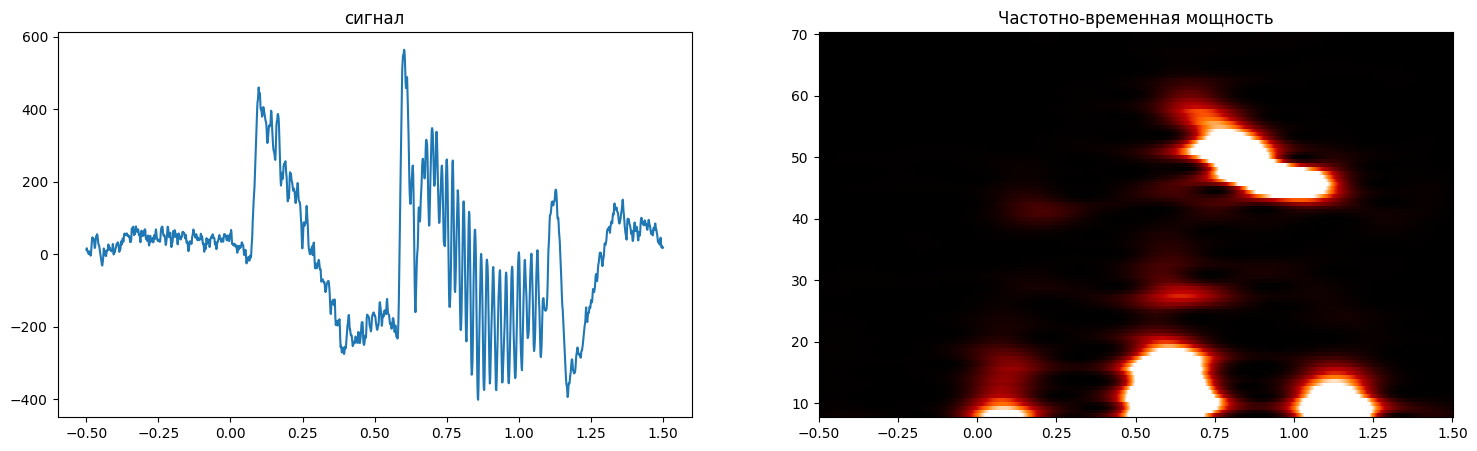

In [8]:
braindata = sio.loadmat('Lab6_Data.mat')
time_vec = braindata['timevec'][0]
s_rate = braindata['srate'][0]
data = braindata['data'][0]

wewlet_time_series = np.arange(-3, 3, 1 / s_rate)
w, Ws = create_wavelets(MorleWewlet, wewlet_time_series, Freq1=100,  Freq2_min=8, Freq2_max=70, wavelet_params={"sigma":0.15})
tf = compute_time_frequency(time_vec, data, w, Ws, wewlet_time_series)

plt.figure(figsize=(18, 5))
plt.subplot(121)
plt.plot(time_vec, data)
plt.title('сигнал')

plt.subplot(122)
plt.pcolormesh(time_vec, w, tf, vmin=0, vmax=1e3, cmap = 'gist_heat')
plt.title('Частотно-временная мощность')

plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import wavfile
from pydub import AudioSegment

# Load the WAV file
sample_rate, audio_data = wavfile.read("Sound_11372.wav")

# Define scales
scales = np.arange(1, 256)

# Initialize an array to store the spectrogram
spectrogram = []

# Perform continuous Morlet wavelet transform for each time slice
for i in range(len(audio_data)):
    time_slice = audio_data[i]
    coef, freqs = pywt.cwt(time_slice, scales, 'morl')
    spectrogram.append(coef)

# Convert the spectrogram to a numpy array
spectrogram = np.array(spectrogram)

# Create a time vector
time = np.arange(0, len(audio_data)) / sample_rate

# Plot the spectrogram
plt.figure()
plt.imshow(np.abs(spectrogram), aspect='auto', extent=[time.min(), time.max(), scales.min(), scales.max()], cmap='jet', interpolation='bilinear')
plt.colorbar(label='Amplitude')
plt.title('Spectrogram with Morlet Wavelet')
plt.xlabel('Time (s)')
plt.ylabel('Scale')
plt.show()

ValueError: File format b'\xff\xfb\xd0d' not understood. Only 'RIFF' and 'RIFX' supported.

In [ ]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import librosa
import pywt

audio_file = 'audio.mp3'
signal, sample_rate = librosa.load(audio_file)

# Создайте свою собственную функцию вейвлета Морле
def morlet2(x):
    return np.cos(6.28318531 * x / scale) * np.exp(-x**2 / (2.0 * (w / 2.355)**2))


# Определите функции для выполнения вейвлет-преобразования Морле, Хаара и "Мексиканская шляпа"
def morlet_wavelet_transform(signal, scales):
    global scale, w
    transformed = scipy.signal.cwt(signal, lambda x: morlet2(x), scales)
    return np.abs(transformed)

def haar_wavelet_transform(signal, scales):
    transformed = scipy.signal.cwt(signal, scipy.signal.ricker, scales)
    return np.abs(transformed)

def mexican_hat_wavelet_transform(signal, scales):
    transformed = pywt.cwt(signal, scales, 'mexh')
    return np.abs(transformed)

# Задайте параметры для вейвлет-преобразования
scales = np.arange(1, 50)  # Пример масштабов
scale = 2.0  # Задайте значение масштаба
w = 6.0  # Задайте значение параметра w

# Выполните вейвлет-преобразование для каждого вейвлета
morlet_spectrogram = morlet_wavelet_transform(signal, scales)
haar_spectrogram = haar_wavelet_transform(signal, scales)
mexican_hat_spectrogram = mexican_hat_wavelet_transform(signal, scales)

# Отобразите спектрограммы с помощью Matplotlib
plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.imshow(morlet_spectrogram, extent=[0, len(signal), 1, 50], aspect='auto', cmap='viridis')
plt.title('Спектрограмма Морле')

plt.subplot(132)
plt.imshow(haar_spectrogram, extent=[0, len(signal), 1, 50], aspect='auto', cmap='viridis')
plt.title('Спектрограмма Хаара')

plt.subplot(133)
plt.imshow(mexican_hat_spectrogram, extent=[0, len(signal), 1, 50], aspect='auto', cmap='viridis')
plt.title('Спектрограмма "Мексиканская шляпа"')

plt.show()

TypeError: morlet_wavelet_transform.<locals>.<lambda>() takes 1 positional argument but 2 were given

Скачайте с интернета любой аудио
файл, постройте для него
спектрограмму используя вейвлет
Морле, вейвлет Хаара и вейвлет
“Мексиканская шляпа. Объясните
результаты.

11025


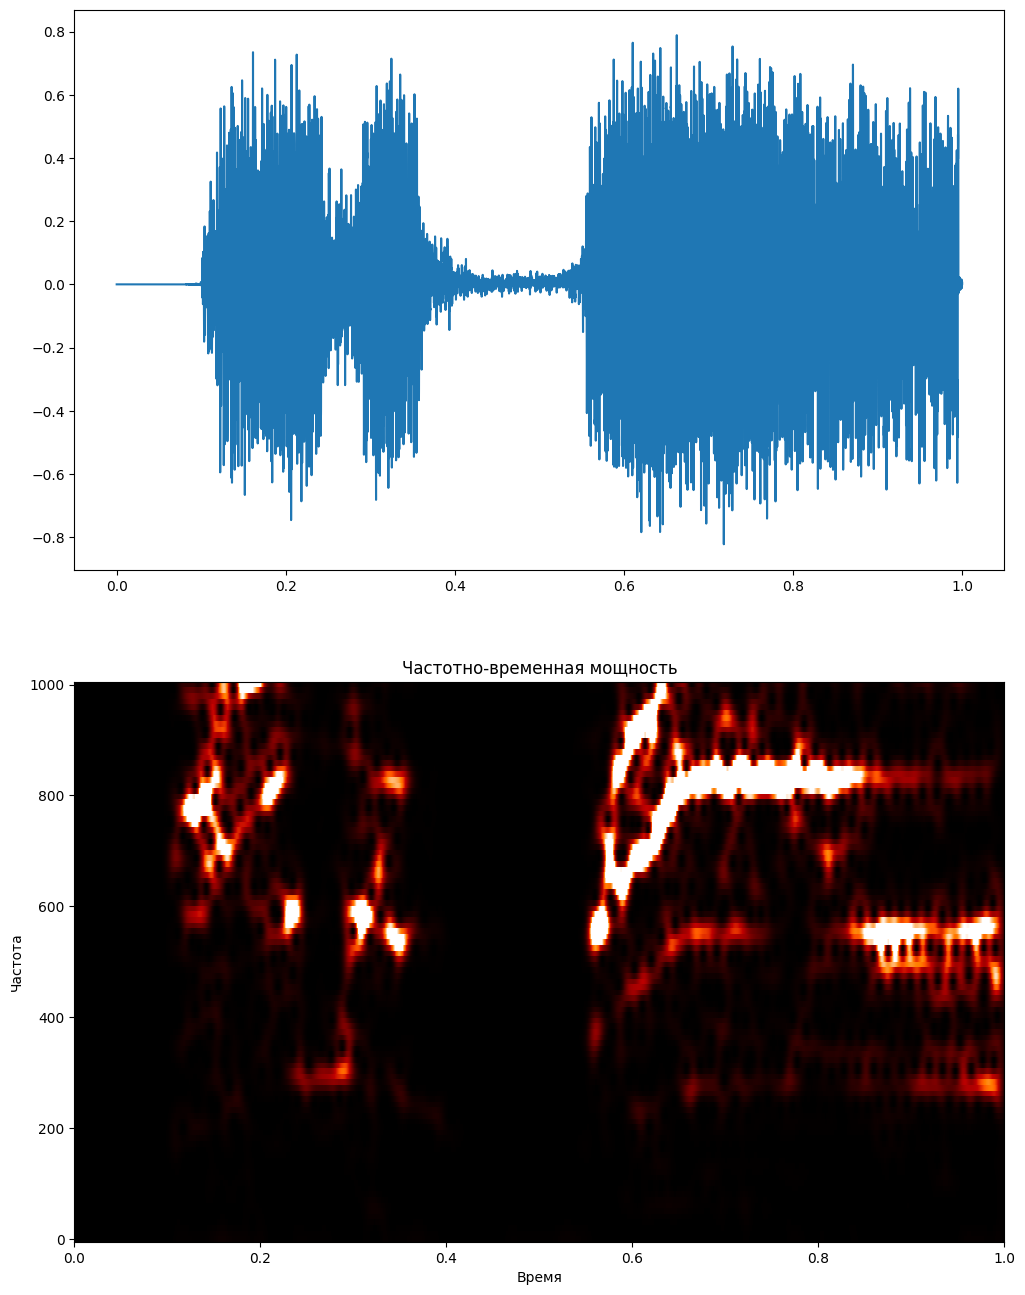

In [16]:
import audio2numpy as a2n

data, s_rate = a2n.audio_from_file("./lab_6_tiny.mp3")
time_series = np.linspace(0, 1, num=len(data))

wewlet_time_series = np.arange(-2, 2, 1 / s_rate)
Freq2, Ws = create_wavelets(MorleWewlet, wewlet_time_series, Freq1=100,  Freq2_min=0, Freq2_max=1000, wavelet_params={"sigma":0.01})
tf = compute_time_frequency(time_series, data, Freq2, Ws, wewlet_time_series)


fig = plt.figure(figsize=(12,16))
plt.subplot(211)
plt.plot(time_series, data)

plt.subplot(212)
plt.pcolormesh(time_series, Freq2, tf, vmin=0, vmax=0.0075, cmap = 'gist_heat')
plt.xlabel('Время')
plt.ylabel('Частота')
plt.title('Частотно-временная мощность')

plt.show()